## PHASE 4 PROJECT: **Building a Time Series Model using Zillow Housing Dataset**

## OVERVIEW

Real estate industry is a highly capital intensive venture and thus extensive, accurate and predictive analysis is key. In this project I will conduct time series data analysis and gather valuable insights which will aid a mid-income house buyer make a house purchase decision wisely. The scope of this project ranges from Overall Business Understanding, Setting up Objectives, Data Understanding, Data Analysis, Data Modeling as well as conclusion and Recommendations. 

## 1. Business Understanding

Real estate sector is very dynamic and a major industry in all economies of the world. Most Americans dream of owning a house and thus Real estate reports and Analysis are vital in keeping them informed. This project utilizes historical data to paint a picture of major trends in the real estate sector over years and form basis of predicting future house prices. Key market factors that will aid in the modeling process will be the location of the houses as per the zip codes. 

## 2. Objectives

The overall objective of this project is to identify the best localities to invest in based on the house prices. 
Analyzing historical data to identify house price trends across different zip codes


## 3. Data Understanding

The dataset to be used in this project is 'zillow_data.csv' sourced from [Zillow Housing Data](https://www.zillow.com/research/data/). Key columns in this dataset include: RegionID, RegionName, City, State, Metro, SizeRank, CountyName, and value (real estate prices). 

#### Import Necessary Libraries

In [1]:

#Importing data libraries
import numpy as np
import pandas as pd

#importing visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#importing math libraries
from math import sqrt

#Importing modeling libraries
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error as MSE
     

Pre-viewing the Dataframe

In [2]:
# Opening the dataframe and pre-viewing it
df= pd.read_csv('zillow_data.csv')
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [3]:
#Checking the shape of the dataset
df.shape   

(14723, 272)

## 4. Data Wrangling

##### Checking for missing values

In [4]:
df.isna().sum()

RegionID         0
RegionName       0
City             0
State            0
Metro         1043
              ... 
2017-12          0
2018-01          0
2018-02          0
2018-03          0
2018-04          0
Length: 272, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [6]:
# For clarity we have to display all the rows with the missing data
df[df.isnull().any(axis=1)].iloc[:-1]

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
20,61625,10011,New York,NY,New York,New York,21,NaN,NaN,NaN,...,12137600,12112600,12036600,12050100,12016300,11946500,11978100,11849300,11563000,11478300
36,61796,10456,New York,NY,New York,Bronx,37,NaN,NaN,NaN,...,357900,357100,356500,357200,362000,368500,374100,379800,388100,394400
105,84613,60611,Chicago,IL,Chicago,Cook,106,NaN,NaN,NaN,...,1475200,1473900,1469500,1472100,1477800,1486000,1497300,1508600,1508100,1493200
151,69340,27410,Greensboro,NC,NaN,Guilford,152,137100.0,136600.0,136000.0,...,212900,213200,213600,214300,215100,216200,217700,219600,221000,221500
156,62048,11238,New York,NY,New York,Kings,157,NaN,NaN,NaN,...,2673300,2696700,2716500,2724000,2744300,2768900,2810700,2848100,2869600,2885300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14706,59046,3215,Waterville Valley,NH,Claremont,Grafton,14707,NaN,NaN,NaN,...,786000,780900,774100,767800,778300,796800,808100,811600,806500,796600
14707,69681,28039,East Spencer,NC,Charlotte,Rowan,14708,NaN,NaN,NaN,...,27300,26400,25500,25100,25100,25600,25800,26600,27700,28300
14708,99401,97733,Crescent,OR,Klamath Falls,Klamath,14709,NaN,NaN,NaN,...,197700,203700,207900,208100,206400,208700,211800,218100,228400,238500
14710,59210,3812,Bartlett,NH,NaN,Carroll,14711,80900.0,80800.0,80800.0,...,215500,217000,219200,221700,223600,224800,226000,226900,227700,228000


#### Dealing with missing Data

The ideal method to use when dealing with missing values in a time series analysis is linear interpolation method. However, this technique will be limited to cleaning numerical data only.  

In [7]:
# First I will look for missing values in each column
missing_columns = df.columns[df.isnull().any()].tolist()
print(missing_columns)

['Metro', '1996-04', '1996-05', '1996-06', '1996-07', '1996-08', '1996-09', '1996-10', '1996-11', '1996-12', '1997-01', '1997-02', '1997-03', '1997-04', '1997-05', '1997-06', '1997-07', '1997-08', '1997-09', '1997-10', '1997-11', '1997-12', '1998-01', '1998-02', '1998-03', '1998-04', '1998-05', '1998-06', '1998-07', '1998-08', '1998-09', '1998-10', '1998-11', '1998-12', '1999-01', '1999-02', '1999-03', '1999-04', '1999-05', '1999-06', '1999-07', '1999-08', '1999-09', '1999-10', '1999-11', '1999-12', '2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06', '2000-07', '2000-08', '2000-09', '2000-10', '2000-11', '2000-12', '2001-01', '2001-02', '2001-03', '2001-04', '2001-05', '2001-06', '2001-07', '2001-08', '2001-09', '2001-10', '2001-11', '2001-12', '2002-01', '2002-02', '2002-03', '2002-04', '2002-05', '2002-06', '2002-07', '2002-08', '2002-09', '2002-10', '2002-11', '2002-12', '2003-01', '2003-02', '2003-03', '2003-04', '2003-05', '2003-06', '2003-07', '2003-08', '2003-09', 

In [8]:
# Iterate through columns with missing values
for col in missing_columns:
    # interpolate using linear method
    df[col] = df[col].interpolate(method='linear')

# Print the updated dataset with interpolated values
print(df)

       RegionID  RegionName                 City State              Metro  \
0         84654       60657              Chicago    IL            Chicago   
1         90668       75070             McKinney    TX  Dallas-Fort Worth   
2         91982       77494                 Katy    TX            Houston   
3         84616       60614              Chicago    IL            Chicago   
4         93144       79936              El Paso    TX            El Paso   
...         ...         ...                  ...   ...                ...   
14718     58333        1338             Ashfield    MA    Greenfield Town   
14719     59107        3293            Woodstock    NH          Claremont   
14720     75672       40404                Berea    KY           Richmond   
14721     93733       81225  Mount Crested Butte    CO                NaN   
14722     95851       89155             Mesquite    NV          Las Vegas   

      CountyName  SizeRank   1996-04   1996-05   1996-06  ...  2017-07  \
0

The other categorical variable column with missing values is 'Metro'. It is not easy to come up with a way of filling them up, so the only way is to drop the null values.

In [9]:
df = df.drop('Metro', axis = 1)

In [10]:

#Confirming existence of missing values
df[df.isnull().any(axis=1)].iloc[:-1]

,RegionID,RegionName,City,State,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04


##### Reshaping the dataset

In [11]:
# Changing dataframe time column from float to datetime format
def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects
    as datetime objects.
    number of returned columns may not match total number of columns in passed dataframe
    """
    return pd.to_datetime(df_new.columns.values[1:], format='%Y-%m')

Next we will manipulate our data from wide to long format. This will help to minimize the number of columns and ease the analysis.

In [12]:
def melt_data(data):
    melted = pd.melt(data, id_vars=['RegionID', 'RegionName', 'City', 'State', 'SizeRank', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

In [13]:
# Previewinga few rows of the long format dataframe
long_df = melt_data(df)
long_df.head()

,RegionID,RegionName,City,State,SizeRank,CountyName,time,value
0,84654,60657,Chicago,IL,1,Cook,1996-04-01,334200.0
1,90668,75070,McKinney,TX,2,Collin,1996-04-01,235700.0
2,91982,77494,Katy,TX,3,Harris,1996-04-01,210400.0
3,84616,60614,Chicago,IL,4,Cook,1996-04-01,498100.0
4,93144,79936,El Paso,TX,5,El Paso,1996-04-01,77300.0


In [14]:
long_df.describe()

,RegionID,RegionName,SizeRank,value
count,3.901595e+06,3.901595e+06,3.901595e+06,3.901595e+06
mean,8.107501e+04,4.822235e+04,7.362000e+03,2.060636e+05
std,3.193304e+04,2.935833e+04,4.250165e+03,2.368017e+05
min,5.819600e+04,1.001000e+03,1.000000e+00,1.130000e+04
25%,6.717400e+04,2.210100e+04,3.681000e+03,9.770000e+04
50%,7.800700e+04,4.610600e+04,7.362000e+03,1.469000e+05
75%,9.092100e+04,7.520600e+04,1.104300e+04,2.354000e+05
max,7.538440e+05,9.990100e+04,1.472300e+04,1.931490e+07


In [15]:
long_df.isna().sum()

RegionID      0
RegionName    0
City          0
State         0
SizeRank      0
CountyName    0
time          0
value         0
dtype: int64

In [16]:
long_df.duplicated().sum()

0

## 5. Explanatory Data Analysis

We begin by setting time as the index of the new dataframe

In [17]:
#set time as the index
long_df.set_index('time', inplace = True)

We resample the the dataframe based on the months with time as the index

In [18]:
#Resampling dataframe using months
monthly = long_df.resample('MS')
month_mean = monthly.mean()
month_mean.tail()

,RegionID,RegionName,SizeRank,value
time,,,,
2017-12-01,81075.010052,48222.348706,7362.0,281095.320247
2018-01-01,81075.010052,48222.348706,7362.0,282657.060382
2018-02-01,81075.010052,48222.348706,7362.0,284368.688447
2018-03-01,81075.010052,48222.348706,7362.0,286511.376757
2018-04-01,81075.010052,48222.348706,7362.0,288039.944305


###### Visualising the Monthly Housing Value 

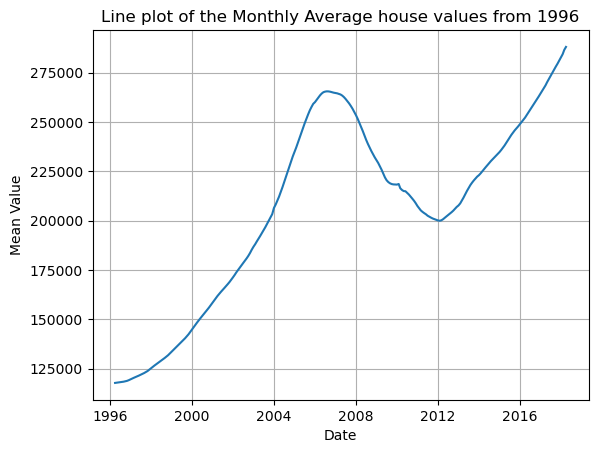

In [19]:
plt.figure()
plt.plot(month_mean.index, month_mean['value'])
plt.title('Line plot of the Monthly Average house values from 1996')
plt.xlabel('Date')
plt.ylabel('Mean Value')
plt.grid(True)
plt.show()

The mean monthly value of houses rose from 1996 to around 2007. Their values drop until 2012. They further rose again until 2018.

###### Visualising Annual Trend in House Values

In [20]:
long_df['Year'] = long_df.index.year

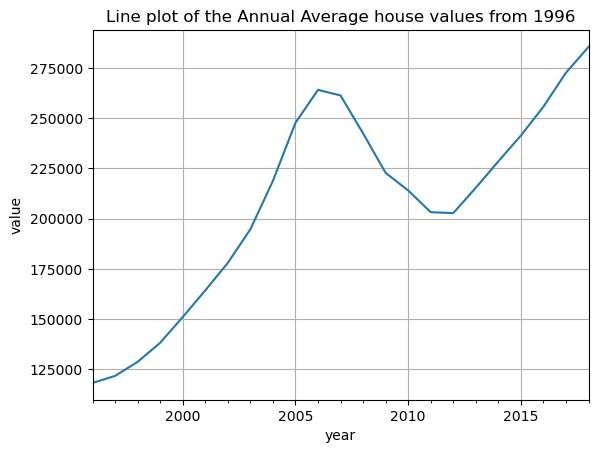

In [21]:
yearly_df = long_df['value'].resample('A').mean()
yearly_df.plot();
plt.title('Line plot of the Annual Average house values from 1996')
plt.xlabel('year')
plt.ylabel('value')
plt.grid()

Visualising Quarterly House Values

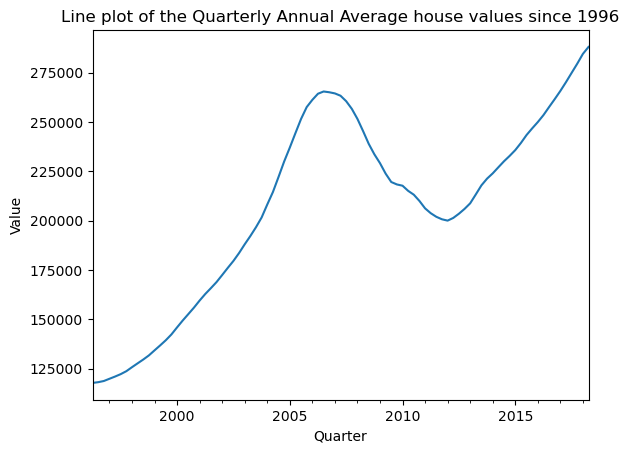

In [22]:

#Plotting the Quarterly annual housing average
quarterly_df = long_df['value'].resample('Q').mean()
quarterly_df.plot();
plt.title('Line plot of the Quarterly Annual Average house values since 1996')
plt.xlabel('Quarter')
plt.ylabel('Value')
plt.show()

##### Grouping Data by Region Name

In [23]:
regional_df = long_df.groupby(['RegionName'])['value'].mean()
regional_df.head()

RegionName
1001    174509.811321
1002    273152.452830
1005    172650.943396
1007    217938.113208
1008    175319.622642
Name: value, dtype: float64

In [24]:
regional_new_df = regional_df.reset_index()
regional_new_df.columns = ['RegionName', 'mean_value']
regional_new_df.head()

,RegionName,mean_value
0,1001,174509.811321
1,1002,273152.452830
2,1005,172650.943396
3,1007,217938.113208
4,1008,175319.622642


In [25]:
#sorting the data from the largest
regional_sorted_df = regional_new_df.sort_values(by = 'mean_value', ascending = False)
regional_sorted_df.head()

,RegionName,mean_value
1405,10021,8.438275e+06
1403,10011,5.444482e+06
1406,10128,5.085436e+06
1404,10014,4.507875e+06
13590,94027,3.487129e+06


In [26]:
#selecting the best regions. with highest house values

In [27]:
best_regions_df = regional_sorted_df.head(10)
best_regions_df

,RegionName,mean_value
1405,10021,8.438275e+06
1403,10011,5.444482e+06
1406,10128,5.085436e+06
1404,10014,4.507875e+06
13590,94027,3.487129e+06
12180,81611,3.147124e+06
12902,90210,2.789977e+06
5528,33480,2.634498e+06
13621,94123,2.630977e+06
13615,94115,2.399030e+06


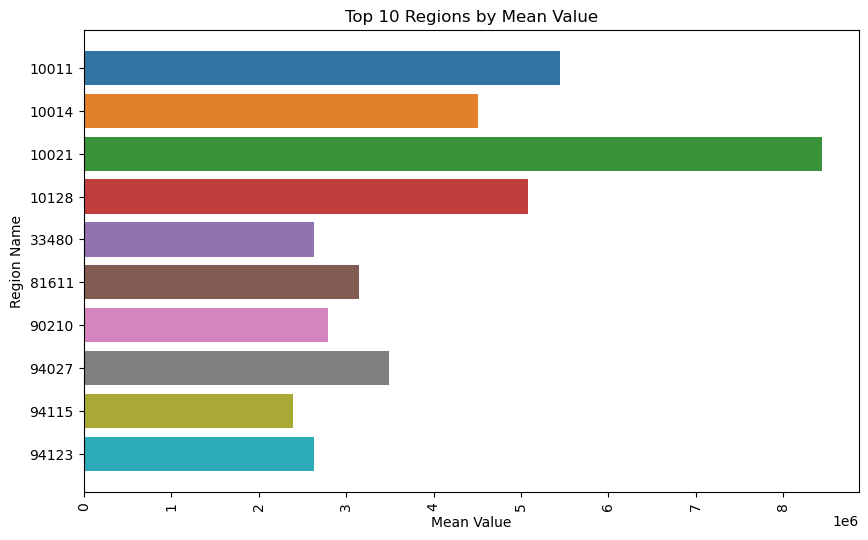

In [28]:
# Visualize the best regions 

plt.figure(figsize=(10, 6))
sns.barplot(x= 'mean_value', y='RegionName', data=best_regions_df, orient='h')
plt.xlabel('Mean Value')
plt.ylabel('Region Name')
plt.title('Top 10 Regions by Mean Value')
plt.xticks(rotation=90)
plt.autoscale(enable=True)
plt.show()

Region 10021 has the highest value houses. 

###### Computing Regions with the highest Return on Investment( R.O.I)

Return on Investment is usually calculated as Net Investment Gain divided by Cost of Investment multiplies by 100%. We are going to consider the latest years in this calculation.

In [29]:
# Subsetting the data to include only the years 2015 to 2018
start_date = '2015-04-01'
end_date = '2018-04-01'
df_subset = long_df.loc[start_date:end_date]

# Print the subsetted DataFrame
print(df_subset)

            RegionID  RegionName                 City State  SizeRank  \
time                                                                    
2015-04-01     84654       60657              Chicago    IL         1   
2015-04-01     90668       75070             McKinney    TX         2   
2015-04-01     91982       77494                 Katy    TX         3   
2015-04-01     84616       60614              Chicago    IL         4   
2015-04-01     93144       79936              El Paso    TX         5   
...              ...         ...                  ...   ...       ...   
2018-04-01     58333        1338             Ashfield    MA     14719   
2018-04-01     59107        3293            Woodstock    NH     14720   
2018-04-01     75672       40404                Berea    KY     14721   
2018-04-01     93733       81225  Mount Crested Butte    CO     14722   
2018-04-01     95851       89155             Mesquite    NV     14723   

           CountyName      value  Year  
time     

In [30]:
# Grouping the melted dataframe by 'RegionName' and 'Year' and calculating the mean
grouped_subset =pd.DataFrame(df_subset.groupby(['RegionName', 'Year',])['value'].mean())
grouped_subset.columns = ['mean_value']
grouped_subset.head(10)

mean_value
RegionName Year               
1001       2015  192322.222222
           2016  199033.333333
           2017  212866.666667
           2018  222425.000000
1002       2015  316555.555556
           2016  316950.000000
           2017  333133.333333
           2018  348950.000000
1005       2015  176522.222222
           2016  191550.000000

Computing ROI

In [31]:
# Group the melted dataframe by 'RegionName' and calculate the mean value for the entire timeframe
grouped_subset = df_subset.groupby('RegionName')['value'].mean().reset_index()
grouped_subset.columns = ['RegionName', 'mean_value']

# Calculate ROI by taking percent change of the mean 'value' column
grouped_subset['ROI'] = grouped_subset['mean_value'].pct_change(periods=3) * 100

# Drop the first row since it will have NaN value for ROI
grouped_subset = grouped_subset.dropna()

# Sort the DataFrame by ROI in descending order
grouped_subset = grouped_subset.sort_values('ROI', ascending=False)

# Print the resulting DataFrame with ROI value
print(grouped_subset.head(10))

       RegionName    mean_value          ROI
1405        10021  1.844019e+07  5782.191013
1403        10011  1.162878e+07  5578.042150
5038        31561  2.391924e+06  3637.381757
1404        10014  9.444808e+06  2915.375522
12180       81611  4.106662e+06  1667.189644
5703        34102  2.665270e+06  1255.234588
1774        11975  2.934378e+06  1234.414906
12181       81615  2.622397e+06  1019.635130
12809       89413  2.030743e+06   956.295953
14060       96141  6.153486e+05   949.453791


In [32]:
# Select regions with the best ROI
best_roi = grouped_subset.head(10)
best_roi

,RegionName,mean_value,ROI
1405,10021,1.844019e+07,5782.191013
1403,10011,1.162878e+07,5578.042150
5038,31561,2.391924e+06,3637.381757
1404,10014,9.444808e+06,2915.375522
12180,81611,4.106662e+06,1667.189644
5703,34102,2.665270e+06,1255.234588
1774,11975,2.934378e+06,1234.414906
12181,81615,2.622397e+06,1019.635130
12809,89413,2.030743e+06,956.295953
14060,96141,6.153486e+05,949.453791


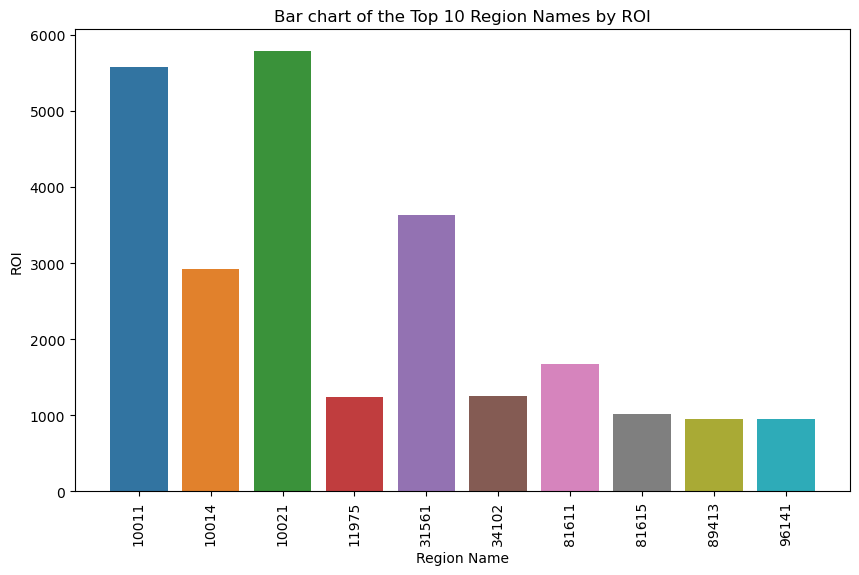

In [33]:

# Visualizing Regions with the highest ROI
plt.figure(figsize=(10, 6))
sns.barplot(x=best_roi['RegionName'], y= best_roi['ROI'])
plt.xlabel('Region Name')
plt.ylabel('ROI')
plt.title('Bar chart of the Top 10 Region Names by ROI')
plt.xticks(rotation=90)
plt.autoscale(enable=True)
plt.show()

##### Locations with the best Return on Investment

In [34]:
# Finding Location Names
bestroi_zipcodes = list(best_roi.RegionName.values)
for i in bestroi_zipcodes:
    city = long_df[long_df['RegionName']==i].City.values[0]
    state = long_df[long_df['RegionName']==i].State.values[0]
    print(f'Zipcode : {i} \nLocation: {city}, {state}\n')

Zipcode : 10021 
Location: New York, NY

Zipcode : 10011 
Location: New York, NY

Zipcode : 31561 
Location: Sea Island, GA

Zipcode : 10014 
Location: New York, NY

Zipcode : 81611 
Location: Aspen, CO

Zipcode : 34102 
Location: Naples, FL

Zipcode : 11975 
Location: Wainscott, NY

Zipcode : 81615 
Location: Snowmass Village, CO

Zipcode : 89413 
Location: Glenbrook, NV

Zipcode : 96141 
Location: Homewood, CA



###### Observing the Trend

In [35]:

region_list = best_roi['RegionName'].unique().tolist()
region_list

[10021, 10011, 31561, 10014, 81611, 34102, 11975, 81615, 89413, 96141]

In [36]:
region_names= [10021, 10011, 31561, 10014, 81611, 34102, 11975, 81615, 89413, 96141]
# Filter the original DataFrame based on the region names
filtered_df = df_subset[df_subset['RegionName'].isin(region_names)]

# Create a new DataFrame with only the 'RegionName' and 'value' columns
new_df = filtered_df.loc[:, ['RegionName', 'value']]

# Print the new DataFrame
print(new_df.tail(10))
print(len(new_df))
print(new_df['RegionName'].unique())

            RegionName       value
time                              
2018-04-01       10011  11478300.0
2018-04-01       10021  17894900.0
2018-04-01       10014   8959300.0
2018-04-01       34102   2715400.0
2018-04-01       81611   4766600.0
2018-04-01       81615   2903600.0
2018-04-01       11975   3467800.0
2018-04-01       96141    689700.0
2018-04-01       31561   2440000.0
2018-04-01       89413   2161900.0
370
[10011 10021 10014 34102 81611 81615 11975 96141 31561 89413]


In [37]:
# yearly sampled values and setting the index as time
new_df['Year'] = new_df.index.year
new_df.head()
     

,RegionName,value,Year
time,,,
2015-04-01,10011,10572500.0,2015
2015-04-01,10021,16644000.0,2015
2015-04-01,10014,9938600.0,2015
2015-04-01,34102,2481500.0,2015
2015-04-01,81611,3956500.0,2015


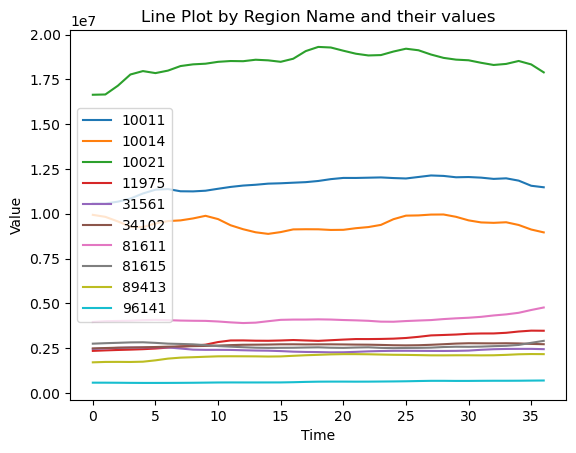

In [38]:
# region trends
for region_name, region_data in new_df.groupby('RegionName'):
  values = region_data['value'].values.flatten()  
  plt.plot(values, label=region_name) 


plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Line Plot by Region Name and their values')
plt.legend()
plt.show()

###### Trends for each top 10 Regions

In [39]:
# Group the dataframe by 'RegionName'
grouped_regions = new_df.groupby('RegionName')

# store dataframes for each region name
region_dataframes = {}

# Iterate over each group and create a separate dataframe for each region name
for region_name, region_group in grouped_regions:
    region_dataframes[region_name] = region_group.copy()

# Access the separate dataframes for each region name
for region_name, region_df in region_dataframes.items():
    print(f"Dataframe for Region Name: {region_name}")
    print(region_df.head())
    print()

Dataframe for Region Name: 10011
            RegionName       value  Year
time                                    
2015-04-01       10011  10572500.0  2015
2015-05-01       10011  10569500.0  2015
2015-06-01       10011  10674900.0  2015
2015-07-01       10011  10848100.0  2015
2015-08-01       10011  11131200.0  2015

Dataframe for Region Name: 10014
            RegionName      value  Year
time                                   
2015-04-01       10014  9938600.0  2015
2015-05-01       10014  9827500.0  2015
2015-06-01       10014  9571200.0  2015
2015-07-01       10014  9278700.0  2015
2015-08-01       10014  9252000.0  2015

Dataframe for Region Name: 10021
            RegionName       value  Year
time                                    
2015-04-01       10021  16644000.0  2015
2015-05-01       10021  16659500.0  2015
2015-06-01       10021  17149200.0  2015
2015-07-01       10021  17775200.0  2015
2015-08-01       10021  17965800.0  2015

Dataframe for Region Name: 11975
           

In [40]:
# Drop the column in each dataframe
# Iterate over each dataframe in the dictionary and drop the 'RegionName' column
for region_name, region_df in region_dataframes.items():
    region_df.drop('RegionName', axis=1, inplace=True)

# Access the modified dataframes
for region_name, region_df in region_dataframes.items():
    print(f"Dataframe for Region Name: {region_name}")
    print(region_df.head())
    print()

Dataframe for Region Name: 10011
                 value  Year
time                        
2015-04-01  10572500.0  2015
2015-05-01  10569500.0  2015
2015-06-01  10674900.0  2015
2015-07-01  10848100.0  2015
2015-08-01  11131200.0  2015

Dataframe for Region Name: 10014
                value  Year
time                       
2015-04-01  9938600.0  2015
2015-05-01  9827500.0  2015
2015-06-01  9571200.0  2015
2015-07-01  9278700.0  2015
2015-08-01  9252000.0  2015

Dataframe for Region Name: 10021
                 value  Year
time                        
2015-04-01  16644000.0  2015
2015-05-01  16659500.0  2015
2015-06-01  17149200.0  2015
2015-07-01  17775200.0  2015
2015-08-01  17965800.0  2015

Dataframe for Region Name: 11975
                value  Year
time                       
2015-04-01  2343300.0  2015
2015-05-01  2371200.0  2015
2015-06-01  2394400.0  2015
2015-07-01  2413700.0  2015
2015-08-01  2437600.0  2015

Dataframe for Region Name: 31561
                value  Year
time 

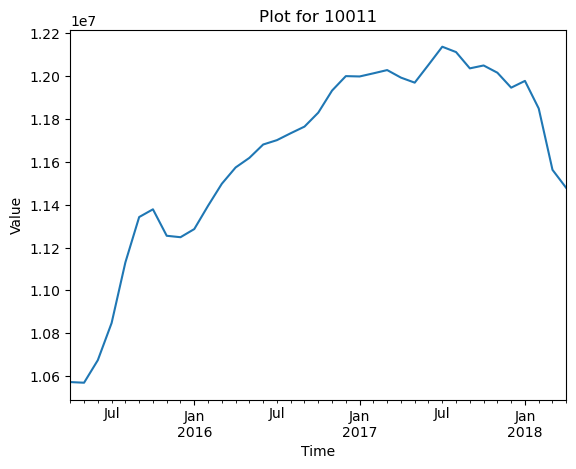

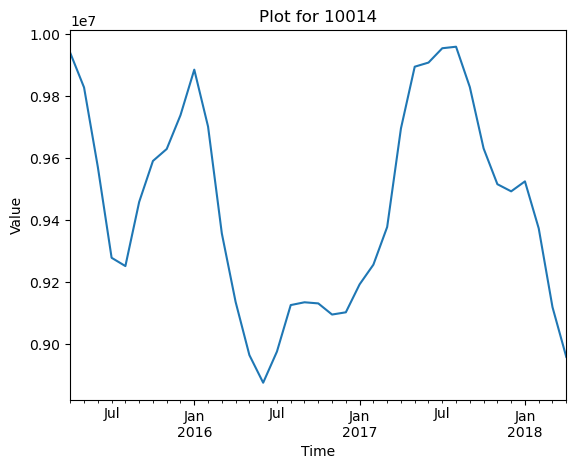

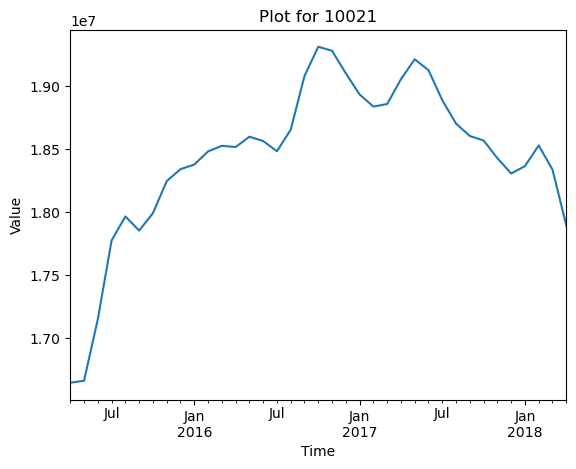

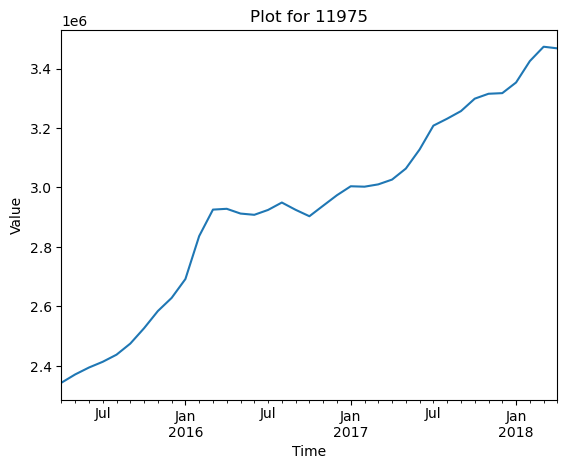

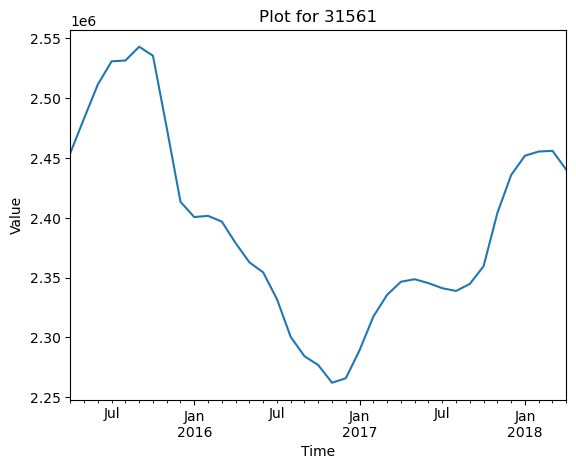

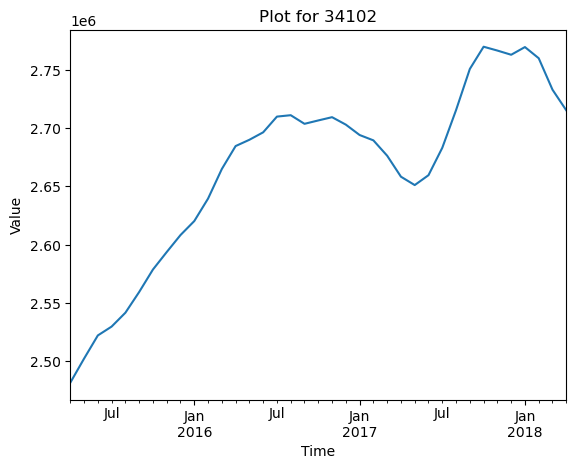

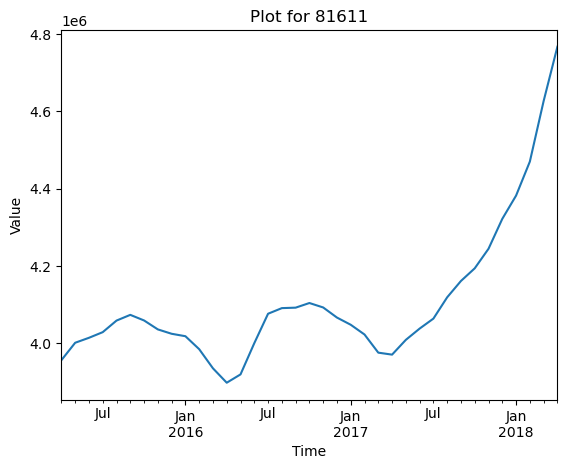

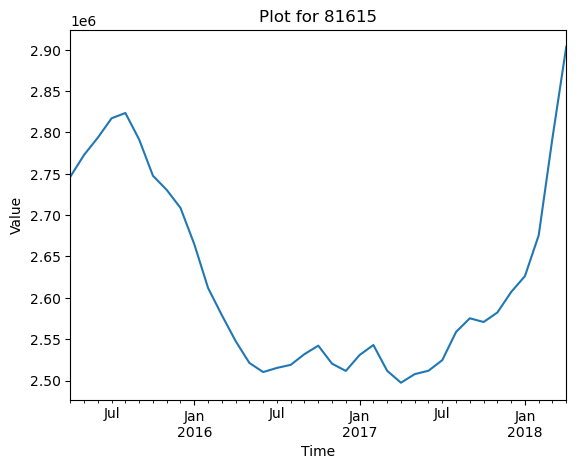

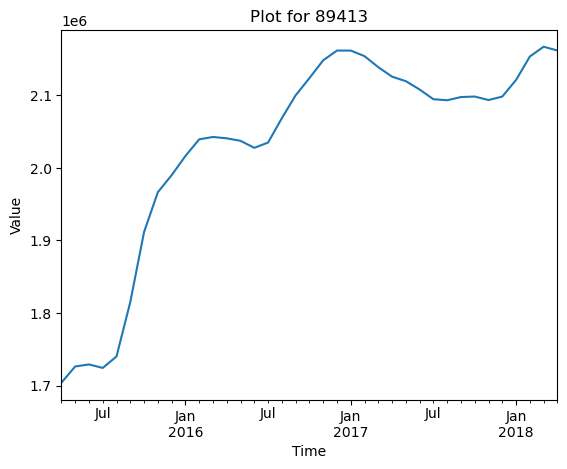

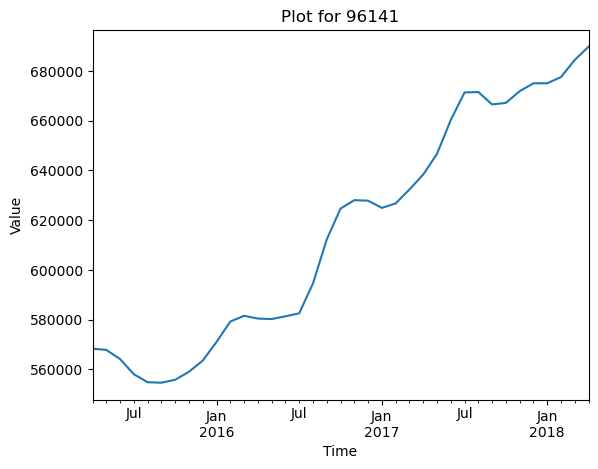

In [41]:
#Iterating through list of RegionNames and plotting for each
for key, df in region_dataframes.items():
    # Plot the 'value' column for the current dataframe
    df['value'].plot()
    plt.title(f'Plot for {key}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.show()

##### Displaying Rolling Statistics 

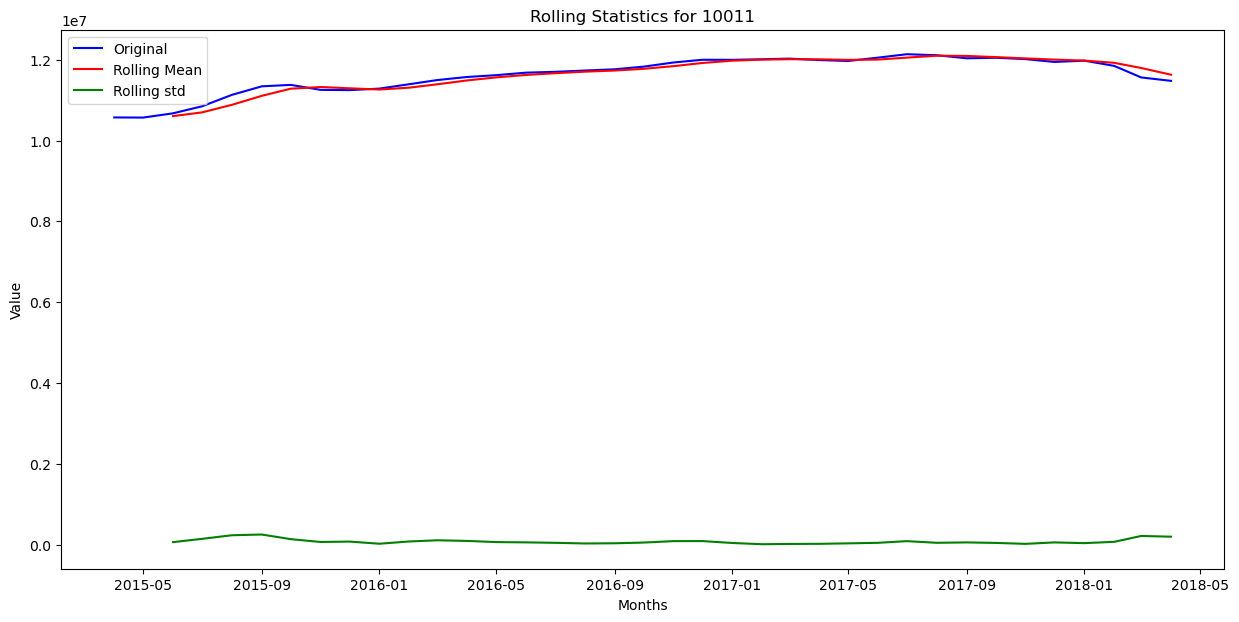

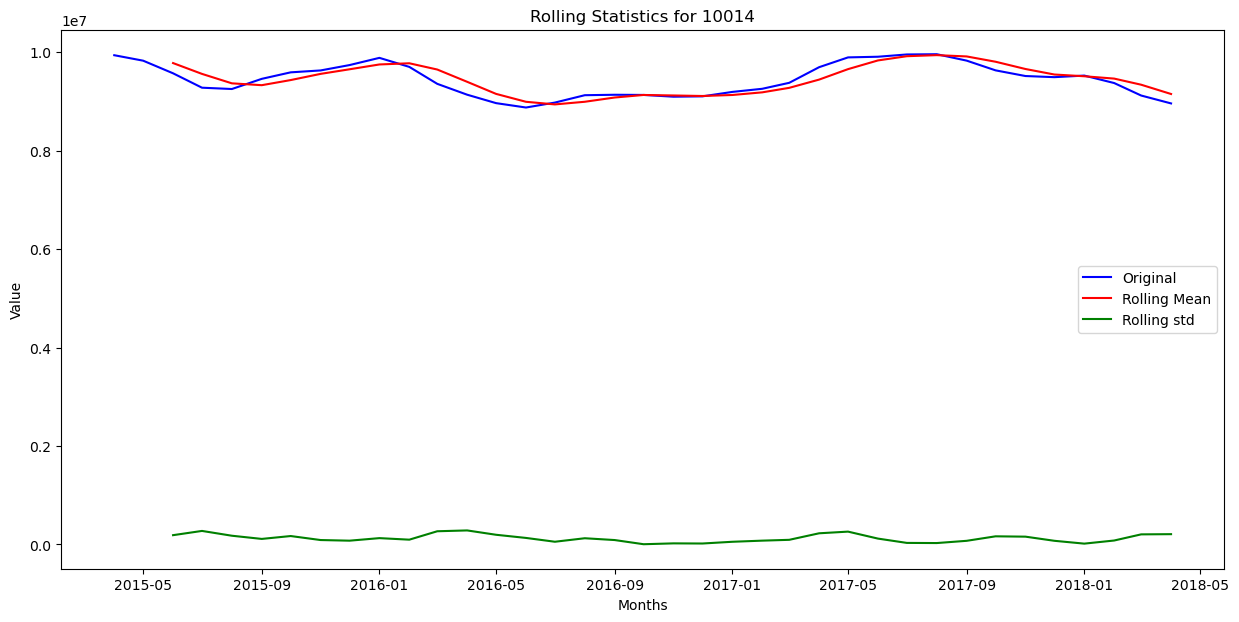

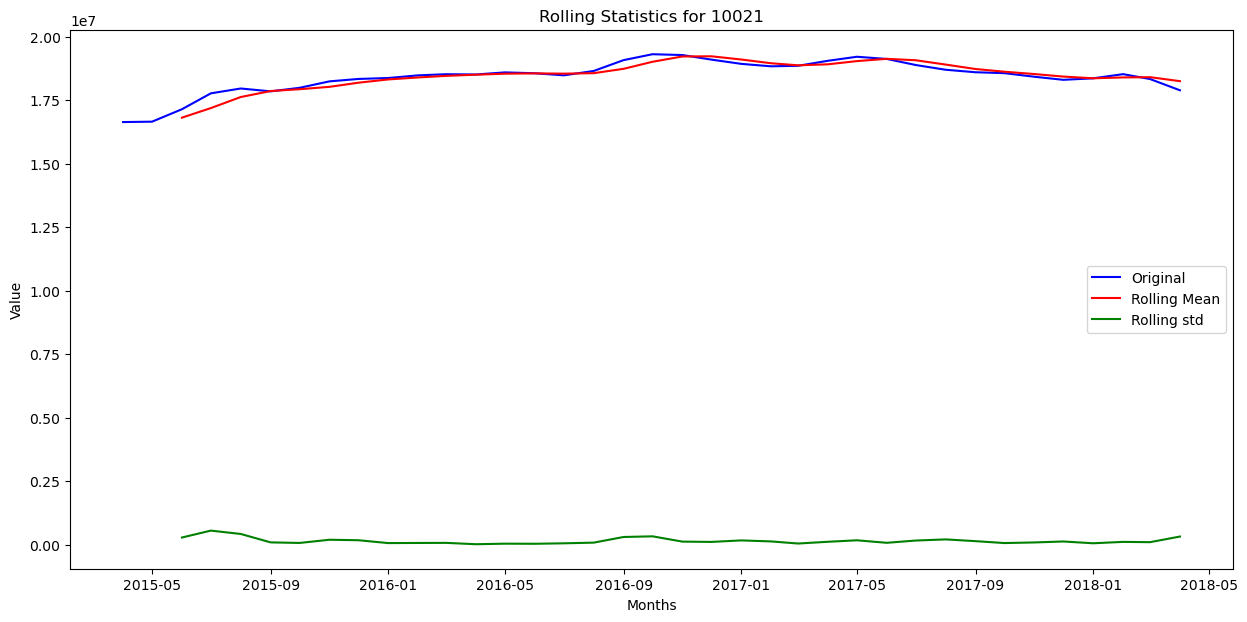

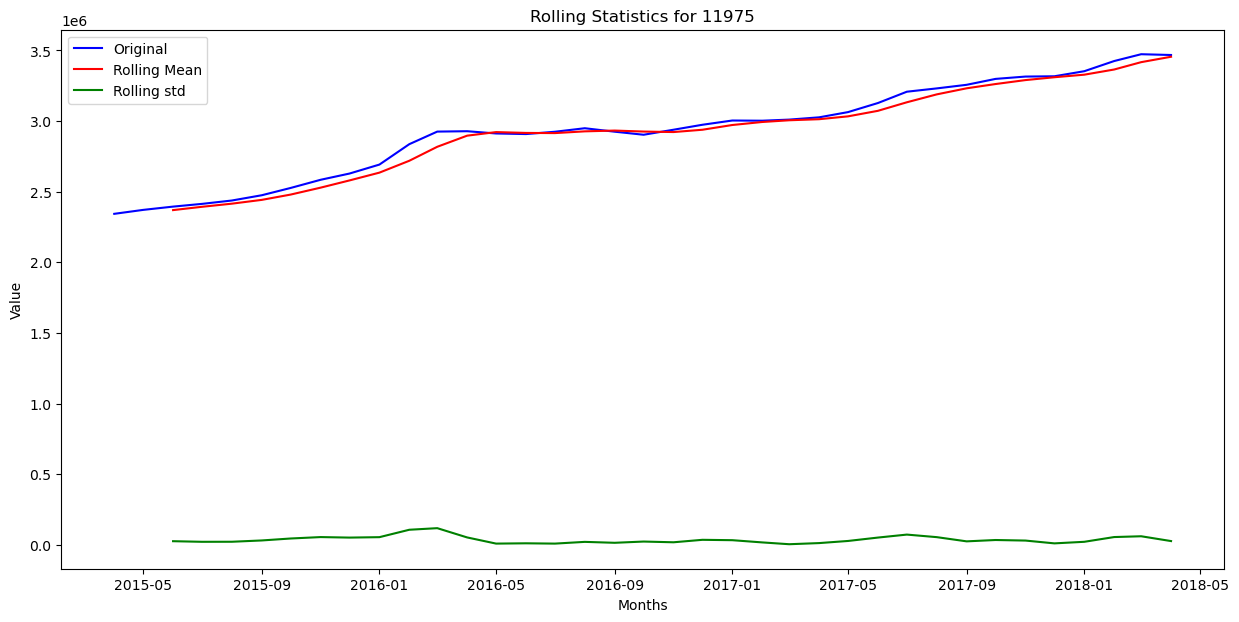

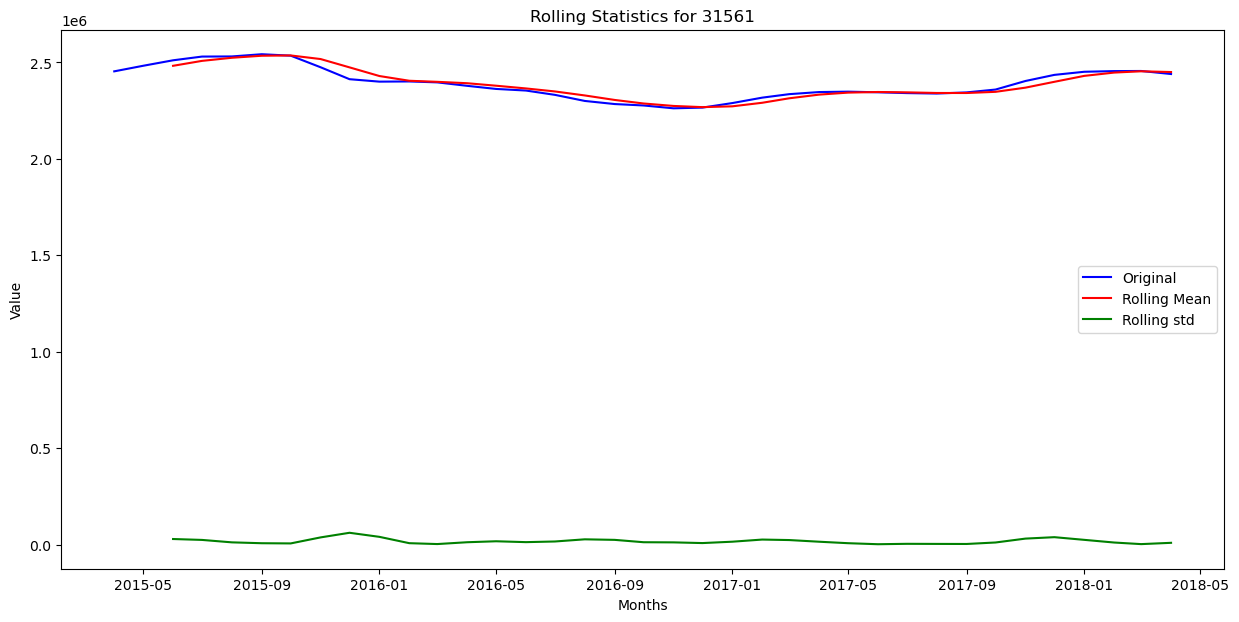

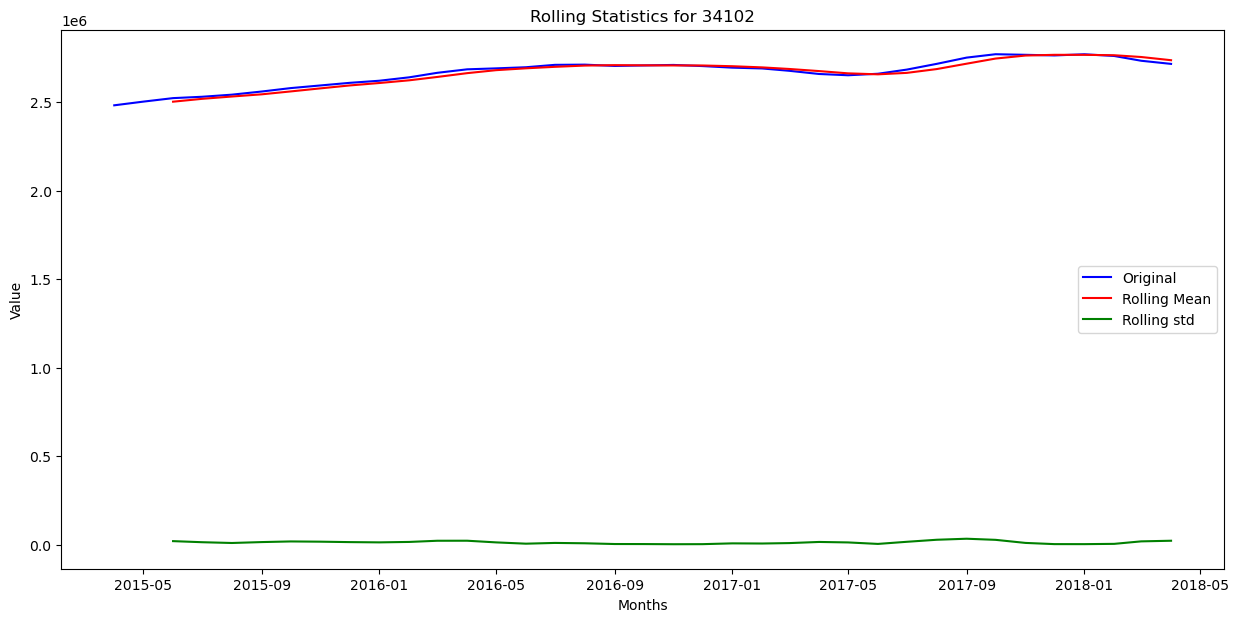

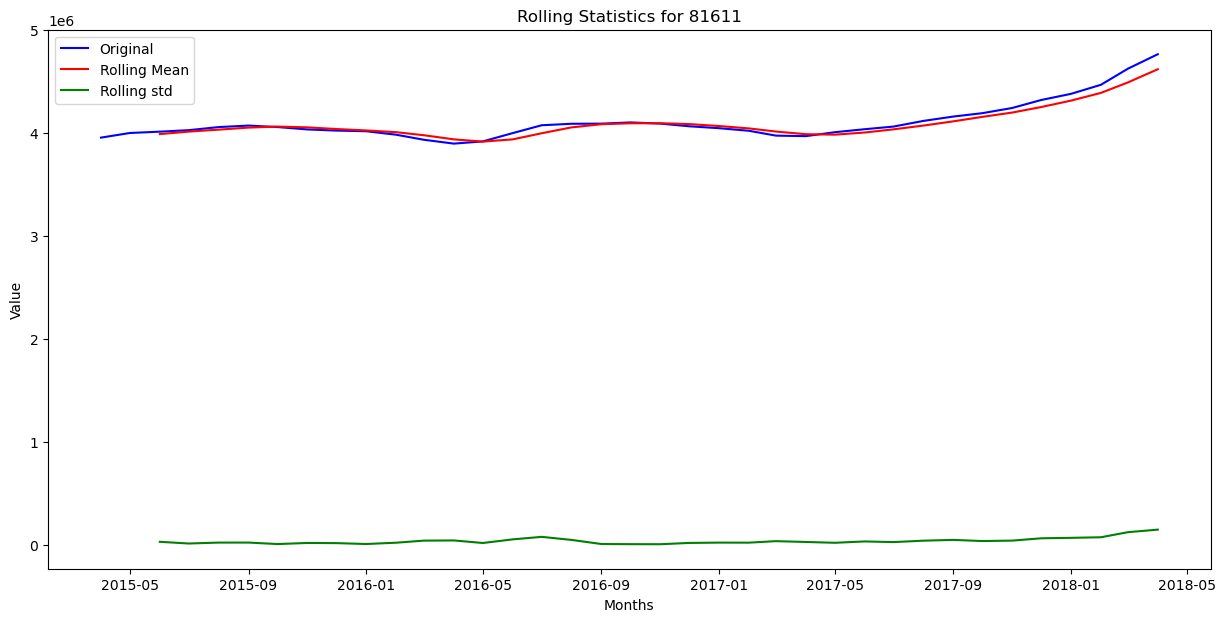

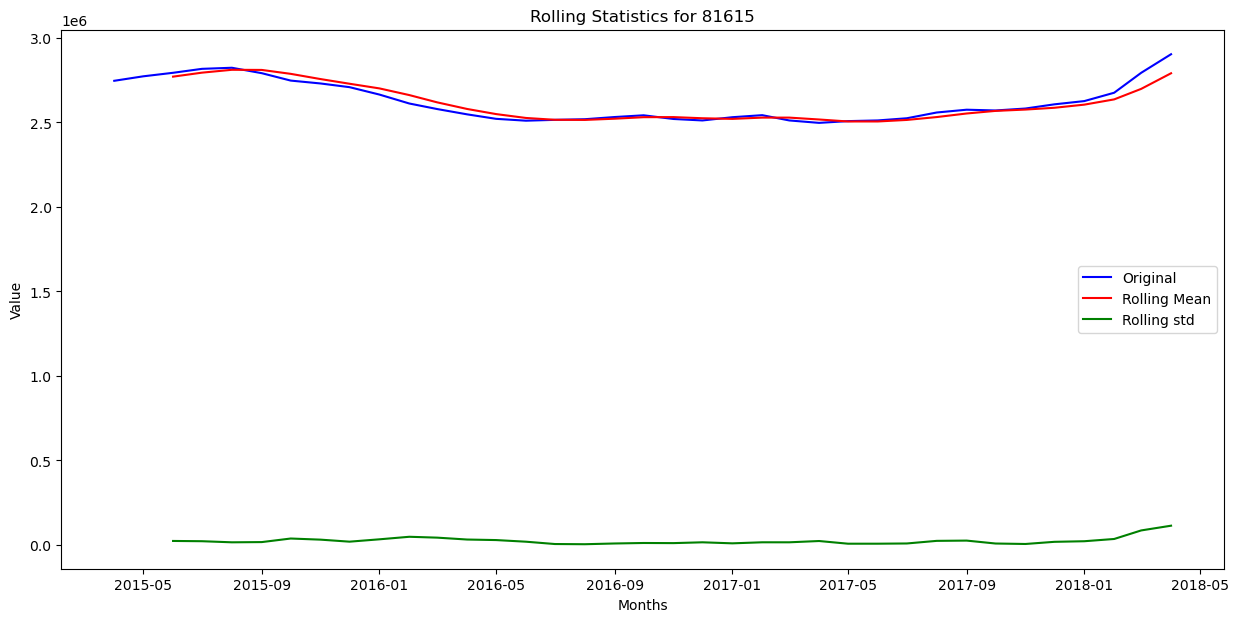

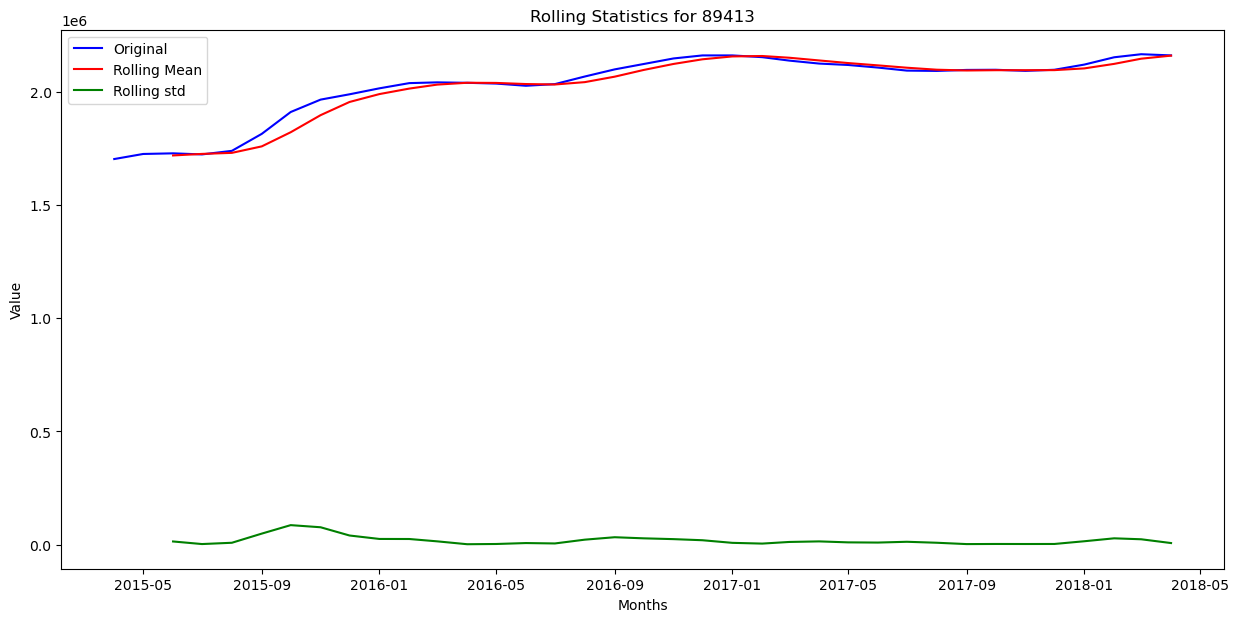

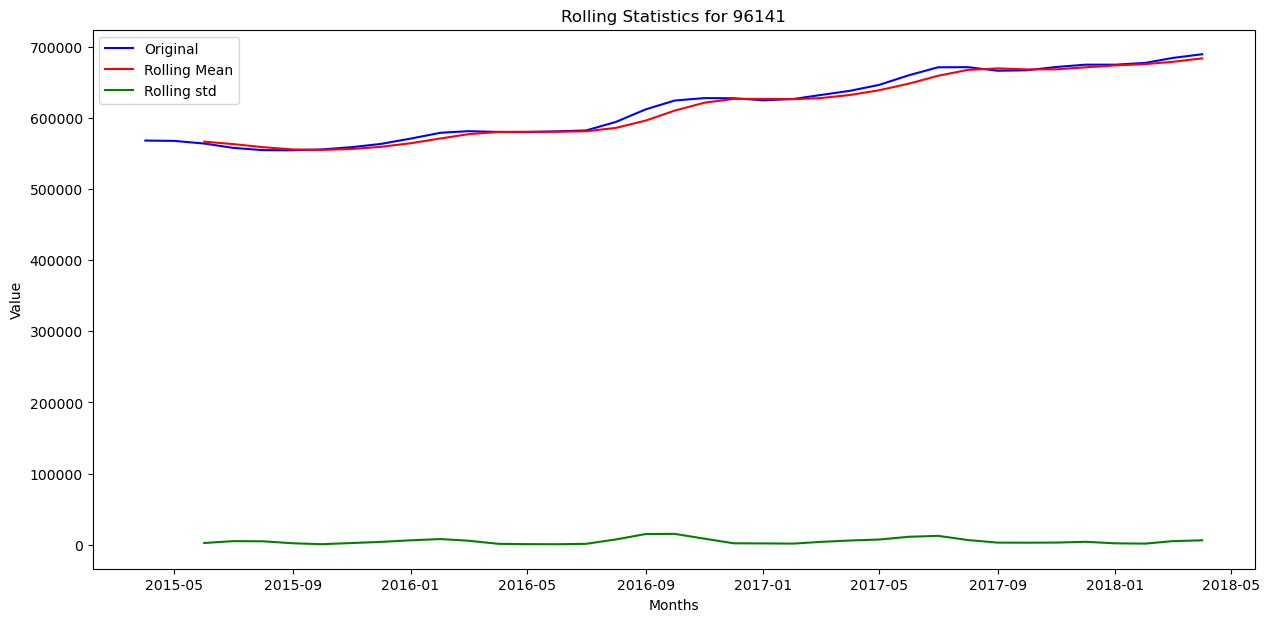

In [42]:
# state size of window for rolling calculations
window_size = 3

for key, df in region_dataframes.items():
    # Calculate the rolling mean and standard deviation for the 'value' column
    rolling_mean = df['value'].rolling(window=window_size).mean()
    rolling_std = df['value'].rolling(window=window_size).std()

    # Plot the original values, rolling mean, and rolling standard deviation
    fig = plt.figure(figsize=(15, 7))
    plt.plot(df['value'], c='blue', label='Original')
    plt.plot(rolling_mean, c='red', label='Rolling Mean')
    plt.plot(rolling_std, c='green', label='Rolling std')
    plt.xlabel('Months')
    plt.ylabel('Value')
    plt.title(f"Rolling Statistics for {key}")
    plt.legend()
    plt.show()


###### Dickey Fuller Test

In [43]:
#Dickey-Fuller test to ascertain visual result.
from statsmodels.tsa.stattools import adfuller

for key, df in region_dataframes.items():
    # Perform Dickey-Fuller test
    print(f'Results of Dickey-Fuller Test for {key}:')
    dftest = adfuller(df['value'])

    # Extract and display test results
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for k, v in dftest[4].items():
        dfoutput[f'Critical Value ({k})'] = v
    print(dfoutput)
    print('\n')

Results of Dickey-Fuller Test for 10011:
Test Statistic                  0.837760
p-value                         0.992222
#Lags Used                     10.000000
Number of Observations Used    26.000000
Critical Value (1%)            -3.711212
Critical Value (5%)            -2.981247
Critical Value (10%)           -2.630095
dtype: float64


Results of Dickey-Fuller Test for 10014:
Test Statistic                 -3.831754
p-value                         0.002599
#Lags Used                      8.000000
Number of Observations Used    28.000000
Critical Value (1%)            -3.688926
Critical Value (5%)            -2.971989
Critical Value (10%)           -2.625296
dtype: float64


Results of Dickey-Fuller Test for 10021:
Test Statistic                 -0.322143
p-value                         0.922309
#Lags Used                      8.000000
Number of Observations Used    28.000000
Critical Value (1%)            -3.688926
Critical Value (5%)            -2.971989
Critical Value (10%)   

* 10011 - Test statistic of 0.837760 is greater than all the critical values, hence we fail to reject the null hypothesis of non-stationarity. The data does not give enough evidence to show that the time series is stationary.

* 10014 - The test statistic of -3.831754 is lower than the critical values, and the p-value of 0.002599 is less than 0.05, so we reject the null hypothesis of non-stationarity. The data provides sufficient evidence to suggest that the time series is stationary.

* 10021 - The test statistic of -0.322143 is greater than the critical values, and the p-value of 0.922309 is greater than 0.05, we fail to reject the null hypothesis of non-stationarity. The data does not provide sufficient evidence to suggest that the time series is stationary.

* 11975 - The test statistic of -1.169849 is greater than the critical values, and the p-value of 0.686430 is greater than 0.05, we fail to reject the null hypothesis of non-stationarity. The data does not provide sufficient evidence to suggest that the time series is stationary.

* 31561 - Since the test statistic of -2.571365 is greater than the critical values, and the p-value of 0.099061 is greater than 0.05, we fail to reject the null hypothesis of non-stationarity. The data does not provide sufficient evidence to suggest that the time series is stationary.

* 34102 - Since the test statistic of -2.339657 is greater than the critical values, and the p-value of 0.159496 is greater than 0.05, we fail to reject the null hypothesis of non-stationarity. The data does not provide sufficient evidence to suggest that the time series is stationary.

* 81611 - Since the test statistic of 2.577411 is greater than the critical values, and the p-value of 0.999071 is greater than 0.05, we fail to reject the null hypothesis of non-stationarity. The data does not provide sufficient evidence to suggest that the time series is stationary.

* 81615 - Since the test statistic of -0.671517 is greater than the critical values, and the p-value of 0.853990 is greater than 0.05, we fail to reject the null hypothesis of non-stationarity. The data does not provide sufficient evidence to suggest that the time series is stationary.

* 89416 - Since the test statistic of -2.852473 is greater than the critical values, and the p-value of 0.051160 is greater than 0.05, we fail to reject the null hypothesis of non-stationarity. The data does not provide sufficient evidence to suggest that the time series is stationary.

* 96141 - Since the test statistic of -2.464834 is greater than the critical values, and the p-value of 0.124267 is greater than 0.05, we fail to reject the null hypothesis of non-stationarity. The data does not provide sufficient evidence to suggest that the time series is stationary.

From the above observations, all other Zipnames contain non-stationarity except 10014. 